In [1]:
! pip install np
! pip install sklearn

In [2]:
from sklearn.metrics import classification_report

# Hyper-Parameter Tunning Using Nature Inspired Algorithms 

We will hyper-tune parameters of the RandomForestClassifier.

## Dataset

In [3]:
import random

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train size - {len(X_train)}\ntest size - {len(X_test)}')

train size - 120
test size - 30


## Hyper-parameters

Now, we will define the `param_grid` which we will be optimizing. 

In [4]:
param_grid = { 
    'n_estimators': range(20, 100, 2), 
    'max_depth': range(5, 100, 20),
    'min_samples_split': range(2, 10, 5),
    'max_features': ["auto"],
}

In [5]:
import numpy as np

print(f'This is {np.multiply.reduce([len(param) for param in param_grid.values()])} combinations in total.')

This is 400 combinations in total.


### Optimization

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
import sys
sys.path.append('../..')

from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot

### Bat Algorithm

In [8]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='ba',
    population_size=10,
    max_n_gen=20,
    max_stagnating_gen=5,
    runs=5,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 400 candidates, which might total in 2000 fits
Optimization finished, 244 candidates were fitted (totalling 1220 fits)
CPU times: user 3.7 s, sys: 212 ms, total: 3.91 s
Wall time: 1min 25s


NatureInspiredSearchCV(algorithm='ba', cv=5,
                       estimator=RandomForestClassifier(random_state=42),
                       max_n_gen=20, max_stagnating_gen=5, n_jobs=-1,
                       param_grid={'max_depth': range(5, 100, 20),
                                   'max_features': ['auto'],
                                   'min_samples_split': range(2, 10, 5),
                                   'n_estimators': range(20, 100, 2)},
                       population_size=10, random_state=42, runs=5,
                       scoring='f1_macro')

<AxesSubplot:xlabel='generation', ylabel='max score'>

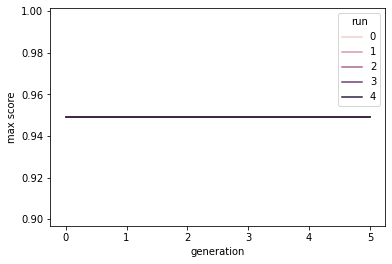

In [9]:
score_by_generation_lineplot(nia_search)

In [10]:
nia_search.best_params_

{'n_estimators': 80,
 'max_depth': 45,
 'min_samples_split': 7,
 'max_features': 'auto'}

In [11]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

